In [60]:
import numpy as np 
import matplotlib.pyplot as plt 
import time

%matplotlib inline

import pylab as pl 
from IPython import display

np.random.seed(1234)

In [61]:
m = 100
x1 = 8 * np.random.rand(m, 1)
x2 = 7 * np.random.rand(m, 1) - 4 

g = 0.8 * x1 + x2 - 3

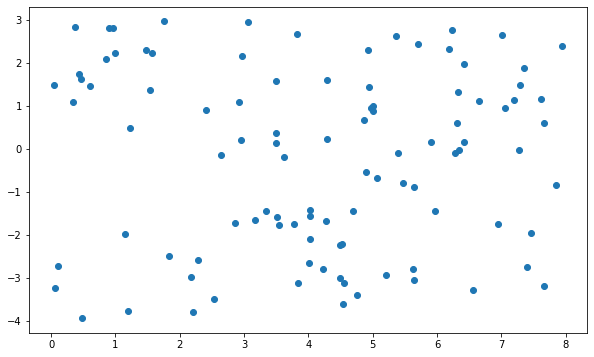

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(x1, x2)
plt.show()

In [63]:
C0 = np.where(g < -1)[0] # class 0 
C1 = np.where(g >= 1)[0] # class 1 

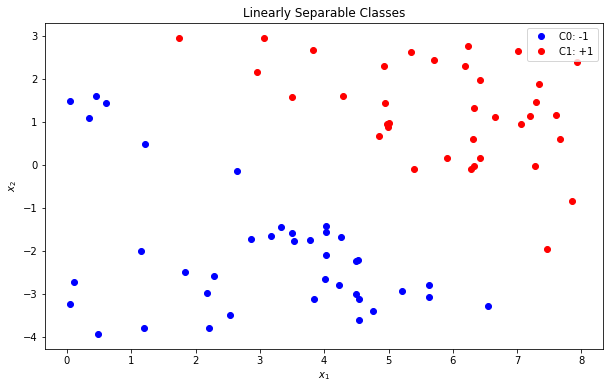

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(x1[C0], x2[C0], 'bo', label='C0: -1')
plt.plot(x1[C1], x2[C1], 'ro', label='C1: +1')
plt.title('Linearly Separable Classes')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [65]:
M0 = C0.shape[0]
M1 = C1.shape[0]

In [66]:
print("number of class 0 (-1) ->", M0)
print("number of class 1 ( 1) ->", M1)

number of class 0 (-1) -> 39
number of class 1 ( 1) -> 36


In [67]:
X0 = np.hstack([np.ones([M0, 1]), x1[C0], x2[C0]])
X1 = np.hstack([np.ones([M1, 1]), x1[C1], x2[C1]])

X = np.vstack([X0, X1])

y = np.vstack([-np.ones([M0, 1]), np.ones([M1, 1])])

X = np.asmatrix(X)
y = np.asmatrix(y)

In [68]:
print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (75, 3)
shape of y: (75, 1)


In [69]:
from sklearn.utils import shuffle

X, y = shuffle(X, y)

print("shape of X:", X.shape)
print("shape of y:", y.shape)

shape of X: (75, 3)
shape of y: (75, 1)


KeyboardInterrupt: 

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

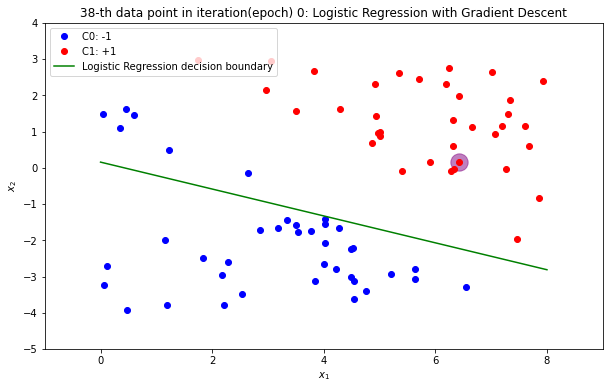

In [71]:
w = np.zeros([3, 1])   # random initialization
w = np.asmatrix(w)

data_points = M0 + M1
epoch = 10000

lr = 1e-4

for k in range(epoch):
    for i in range(data_points):
        
        # cross-entropy gradient 
        grad = y[i, 0] * X[i, :].T * (1 / (1 + np.exp(y[i, 0]*w.T*X[i, :].T))) 
        w = w + lr * grad
        
        if k % 100 == 0:
            plt.figure(figsize=(10, 6))
            
            # plotting
            # mark current data point with purple
            pl.scatter(X[i, 1], X[i, 2], alpha=0.5, c='purple', s=300)

            # show all points
            plt.plot(x1[C0], x2[C0], 'bo', label='C0: -1')
            plt.plot(x1[C1], x2[C1], 'ro', label='C1: +1')

            # decision boundary
            x1p = np.linspace(0, 8, 100).reshape(-1, 1)
            x2p = -w[1, 0] / w[2, 0] * x1p - w[0, 0] / w[2, 0]
            pl.plot(x1p, x2p, c='green', label='Logistic Regression decision boundary')
            
            pl.title('Linearly Separable Classes')
            pl.xlabel('$x_1$')
            pl.ylabel('$x_2$')
            pl.legend(loc=2)
            pl.xlim([-1, 9])
            pl.ylim([-5, 4])
            pl.title(f'{i}-th data point in iteration(epoch) {k}: Logistic Regression with Gradient Descent')

            display.clear_output(wait=True)
            display.display(pl.gcf())
            time.sleep(0.01) 

            pl.clf()
        